Computational Exercise
==

In [12]:
using Distributions
using Plots
pyplot()

Plots.PyPlotBackend()

In [13]:
function sim(n=200, ρ=0.5)
    v1 = rand(Uniform(0,sqrt(12)),n)
    v2 = rand(Uniform(0,sqrt(12)),n)
    X = ones(200,3)
    X[:,2] = v1
    X[:,3] = sqrt(1-ρ^2)*v2 + ρ*v1
    y = 1 .+ X[:,2] + X[:,3] + rand(Normal(),n)
    
    β = (X'X)\(X'y)
    
    R = [0 0; 1 0; 0 1]
    c = [1; 1]
    βA = β -inv(X'X)*R*inv(R'inv(X'X)R)*(R'β-c)
    
    R = [0; 1; 1]
    c = [2]
    βB = β -inv(X'X)*R/(R'inv(X'X)R)*(R'β-c)
    
    return vcat(β, βA, βB)
end

sim (generic function with 3 methods)

b.
--

In [14]:
simulations = SharedArray(Float64, 10000, 9)
for i in 1:10000
    simulations[i,:] = sim(200,0)
end;

First elements:


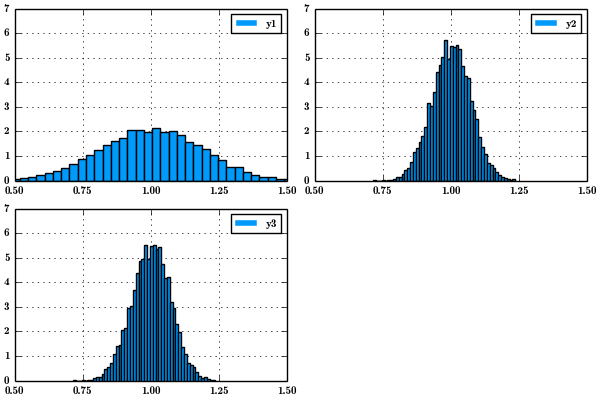

In [15]:
histogram(simulations[:,[1,4,7]], layout=3, nbins=50, normed=true, ylim=(0,7),xlim=(0.5,1.5))

Since both restricted regressions have correct constraints, they lead to less variance even in the unrestricted variable $\beta_0$. The stronger constraint $\cal{A}$ (mind: $\cal{A} \implies \cal{B}$) leads to about the same variance as $\cal{B}$.

Third elements:


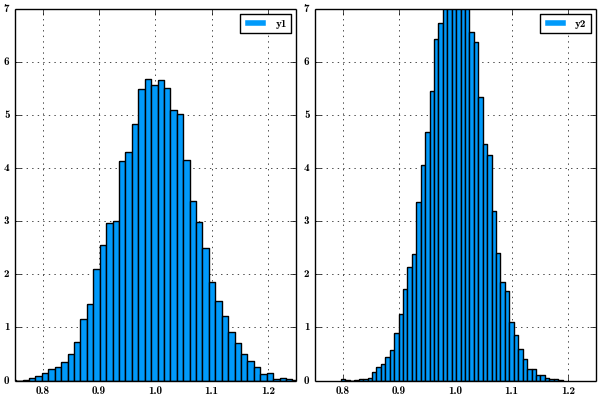

In [16]:
histogram(simulations[:,[3,9]], layout=2, nbins=50, normed=true, ylim=(0,7),xlim=(0.75,1.25))

Same for $\beta_3$, less variance.

c.
--

In [17]:
simulations = SharedArray(Float64, 10000, 9)
for i in 1:10000
    simulations[i,:] = sim(200,0.5)
end;

First elements:


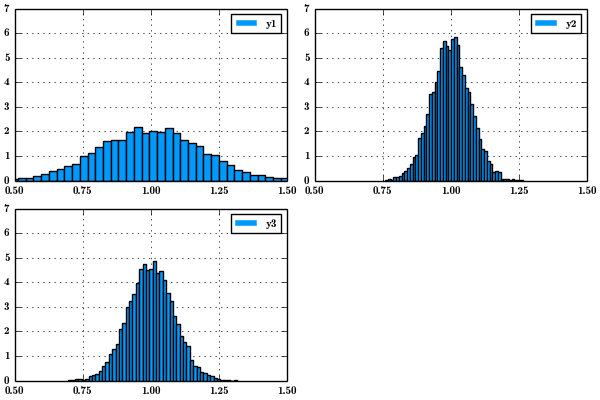

In [18]:
histogram(simulations[:,[1,4,7]], layout=3, nbins=50, normed=true, ylim=(0,7),xlim=(0.5,1.5))

Both restricted regressions are more precise, but $\cal{A}$ is a bit better than $\cal{B}$. The increased $\rho$ makes the spaces spanned by $X_1$ and $X_2$ closed to each other. The constraint $\cal{B}$ then does not mean much.

Third elements:


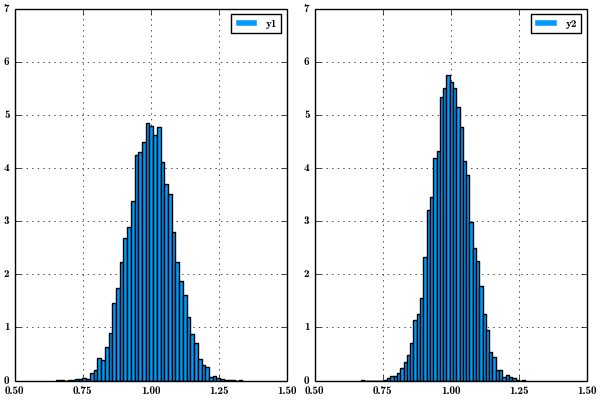

In [19]:
histogram(simulations[:,[3,9]], layout=2, nbins=50, normed=true, ylim=(0,7),xlim=(0.5,1.5))

The restriction does not yield a lower variance.

d.
--

In [20]:
simulations = SharedArray(Float64, 10000, 9)
for i in 1:10000
    simulations[i,:] = sim(200,0.9)
end;

First elements:


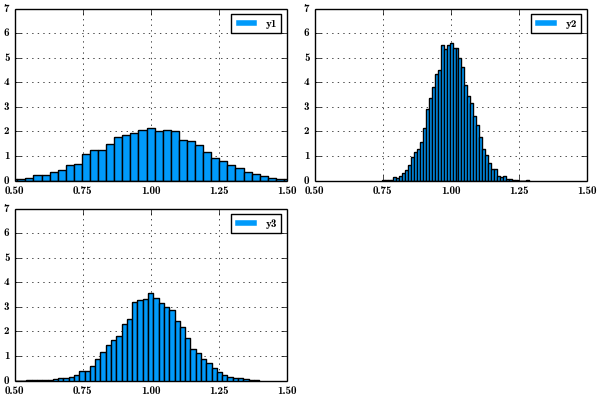

In [21]:
histogram(simulations[:,[1,4,7]], layout=3, nbins=50, normed=true, ylim=(0,7),xlim=(0.5,1.5))

Third elements:


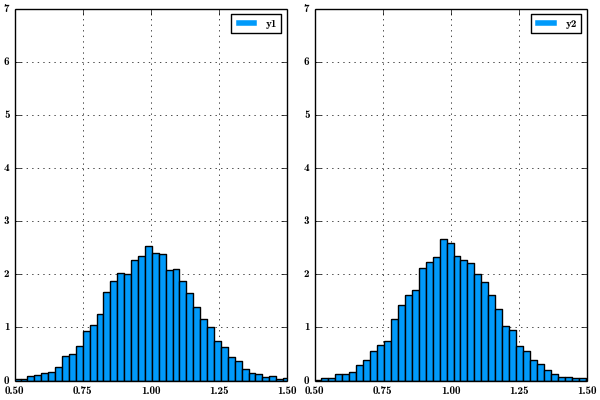

In [22]:
histogram(simulations[:,[3,9]], layout=2, nbins=50, normed=true, ylim=(0,7),xlim=(0.5,1.5))

$\rho=0.9$ is an even more extreme case.